# Exercises 2

### Important Note: Enabling GPU
To make sure this is enabled, go to the "Runtime" menu at the top of the page, and click select the "Change Runtime Type" option. Under "Hardware Accelerator", choose "GPU" and then hit "Save". 

In [1]:
import itertools

import argparse
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [2]:
BATCH_SIZE = 64
TEST_BATCH_SIZE = 1000
LEARNING_RATE = 1
GAMMA = 0.7
RANDOM_SEED = 1

Using downloaded and verified file: ../data/MNIST/raw/train-images-idx3-ubyte.gz
Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw


  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw


  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw


  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw
Processing...
Done!
#################################
# Input:


/home/jmf/.local/lib/python3.9/site-packages/torchvision/datasets/mnist.py:479: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Images is tensor of shape: torch.Size([64, 1, 28, 28]), labels is tensor of shape: torch.Size([64])
Images:


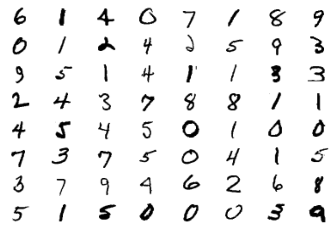

Labels:
6,1,4,0,7,1,8,9,
0,1,2,4,2,5,9,3,
9,5,1,4,1,1,3,3,
2,4,3,7,8,8,1,1,
4,5,4,5,0,1,0,0,
7,3,7,5,0,4,1,5,
3,7,9,4,6,2,6,8,
5,1,5,0,0,0,3,9,


In [3]:
torch.manual_seed(RANDOM_SEED)

device = torch.device("cuda")

train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=BATCH_SIZE, shuffle=True, num_workers=1, pin_memory=True)
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=False, transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=TEST_BATCH_SIZE, shuffle=True, num_workers=1, pin_memory=True)

print("#################################")
print("# Input:")

train_iter = iter(train_loader)
test_iter = iter(test_loader)
images, labels = train_iter.next()
print(f'Images is tensor of shape: {images.shape}, labels is tensor of shape: {labels.shape}')
figure = plt.figure()
num_of_images = 64
for index in range(1, num_of_images + 1):
    plt.subplot(8, 8, index)
    plt.axis('off')
    plt.imshow(images[index-1].numpy().squeeze(), cmap='gray_r')
print("Images:")
plt.show()
print("Labels:")
for i in range(8):
    for j in range(8):
        print(labels[i*8+j].item(), end=',')
    print()

In [4]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.dropout1 = nn.Dropout2d(0.25)
        self.dropout2 = nn.Dropout2d(0.5)
        self.fc1 = nn.Linear(9216, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        output = F.log_softmax(x, dim=1)
        return output

In [5]:
model = Model().to(device)
optimizer = optim.Adadelta(model.parameters(), lr=LEARNING_RATE)

#################################
# Training:
Train Epoch: 0 [0/60000 (0%)]	Loss: 2.306195
Train Epoch: 0 [6400/60000 (11%)]	Loss: 0.374484
Train Epoch: 0 [12800/60000 (21%)]	Loss: 0.327327
Train Epoch: 0 [19200/60000 (32%)]	Loss: 0.084144
Train Epoch: 0 [25600/60000 (43%)]	Loss: 0.263633
Train Epoch: 0 [32000/60000 (53%)]	Loss: 0.223968
Train Epoch: 0 [38400/60000 (64%)]	Loss: 0.115585
Train Epoch: 0 [44800/60000 (75%)]	Loss: 0.040013
Train Epoch: 0 [51200/60000 (85%)]	Loss: 0.178147
Train Epoch: 0 [57600/60000 (96%)]	Loss: 0.022600

Test set: Average loss: 795.8665, Accuracy: 9750/10000 (98%)

Images is tensor of shape: torch.Size([1000, 1, 28, 28]), preds is tensor of shape: (1000, 1)
#################################
# Test Output:
Images:


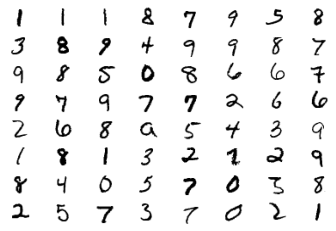

Preds:
1,1,1,8,7,9,5,8,
3,8,9,4,9,9,8,7,
9,8,5,0,8,6,6,7,
9,7,9,7,7,2,6,6,
2,6,8,2,5,4,3,9,
1,8,1,3,2,2,2,9,
8,4,0,5,7,0,3,8,
2,5,7,3,7,0,2,1,


In [6]:
EPOCHS = 1
ITER_PER_EPOCH = 1000
TEST_ITER_PER_EPOCH = len(test_loader)
LOG_INTERVAL = 100

print("#################################")
print("# Training:")

for epoch in range(EPOCHS):
    train_iter = itertools.cycle(iter(train_loader))
    test_iter =  iter(test_loader)

    for batch_idx in range(ITER_PER_EPOCH):
        (data, target) = next(train_iter)
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % LOG_INTERVAL == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

    test_loss = 0
    total = 0
    correct = 0
    images = None
    preds = None
    with torch.no_grad():
        for batch_idx in range(TEST_ITER_PER_EPOCH):
            (data, target) = next(test_iter)

            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()
            total += data.shape[0]
            images = data.cpu()
            preds = pred.cpu().numpy()
        print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
            test_loss, correct, total,
            100. * correct / total))

    print(f'Images is tensor of shape: {images.shape}, preds is tensor of shape: {preds.shape}')
    figure = plt.figure()
    num_of_images = 64
    for index in range(num_of_images):
        plt.subplot(8, 8, index+1)
        plt.axis('off')
        plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')
    print("#################################")
    print("# Test Output:")

    print("Images:")
    plt.show()
    print("Preds:")
    for i in range(8):
        for j in range(8):
            print(preds[i*8+j].item(), end=',')
        print()

## Exercise 2.1
 - Change the above to use [Adam](https://pytorch.org/docs/stable/optim.html#torch.optim.Adam) as an optimizer
 - Retrain the model
 - How does the accuracy change? Can you improve accuracy by modifying the learning rate?

## Exercise 2.2
 - Add a plot which shows loss over time
 - Add a second plot which shows test accuracy over time (you can use (correct / total) for your accuracy score
 - Set EPOCHS to 10 and rerun to see how test accuracy increases

## Exercise 2.3
Try increase / reduce the amount of dropout on the model. How does this affect the accuracy? 